# GridSearch


Importing the libraries


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the dataset

In [29]:
dataset=pd.read_csv('C:\\Users\\BizAct-110\\OneDrive\\ML_Practice\\Model Selection\\GridSearch\\Social_Network_Ads.csv')
X=dataset.iloc[:,2:4].values
y=dataset.iloc[:,-1].values

In [30]:
X

array([[1.90e+01, 1.90e+04],
       [3.50e+01, 2.00e+04],
       [2.60e+01, 4.30e+04],
       [2.70e+01, 5.70e+04],
       [1.90e+01, 7.60e+04],
       [2.70e+01, 5.80e+04],
       [2.70e+01, 8.40e+04],
       [3.20e+01, 1.50e+05],
       [2.50e+01, 3.30e+04],
       [3.50e+01, 6.50e+04],
       [2.60e+01, 8.00e+04],
       [2.60e+01, 5.20e+04],
       [2.00e+01, 8.60e+04],
       [3.20e+01, 1.80e+04],
       [1.80e+01, 8.20e+04],
       [2.90e+01, 8.00e+04],
       [4.70e+01, 2.50e+04],
       [4.50e+01, 2.60e+04],
       [4.60e+01, 2.80e+04],
       [4.80e+01, 2.90e+04],
       [4.50e+01, 2.20e+04],
       [4.70e+01, 4.90e+04],
       [4.80e+01, 4.10e+04],
       [4.50e+01, 2.20e+04],
       [4.60e+01, 2.30e+04],
       [4.70e+01, 2.00e+04],
       [4.90e+01, 2.80e+04],
       [4.70e+01, 3.00e+04],
       [2.90e+01, 4.30e+04],
       [3.10e+01, 1.80e+04],
       [3.10e+01, 7.40e+04],
       [2.70e+01, 1.37e+05],
       [2.10e+01, 1.60e+04],
       [2.80e+01, 4.40e+04],
       [2.70e+

Spliting the dataset into training set and test set

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


Featue Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_test=sc.fit_transform(X_test)
X_train=sc.transform(X_train)

Training the kernel svm onto training set

In [33]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_test,y_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

Creating the confusion metic

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[56  2]
 [ 2 20]]


0.95

Applying K-fold cross validation

In [35]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}%'.format(accuracies.std()*100))

Accuracy: 90.03%
Standard Deviation: 4.52%


C:\Users\BizAct-110\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\BizAct-110\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\BizAct-110\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\BizAct-110\Anaconda3\lib\site-packages\sklearn\svm\base

Applying the grid search to find the best model and the best parameter

In [36]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[0.25,0.5,0.75,1],'kernel':['linear']},
            {'C':[0.25,0.5,0.75,1],'kernel':['rbf'], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search=GridSearchCV(estimator=classifier,
                         param_grid=parameters,
                         scoring='accuracy',
                         cv=10,
                         n_jobs=-1)
grid_search.fit(X_train,y_train)
best_accuracy=grid_search.best_score_
best_parameter=grid_search.best_params_
print('Best Accuracy: {:.2f}%'.format(best_accuracy*100))
print('Best Parameter: ',best_parameter )

Best Accuracy: 91.25%
Best Parameter:  {'C': 0.75, 'gamma': 0.8, 'kernel': 'rbf'}


Vizualising the training set result

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


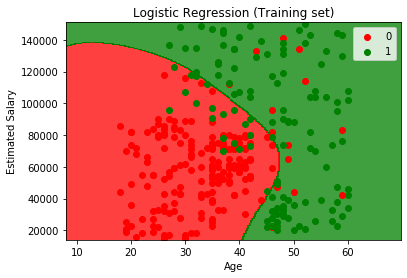

In [37]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.invaX_train), y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Vizualizing the test set result

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


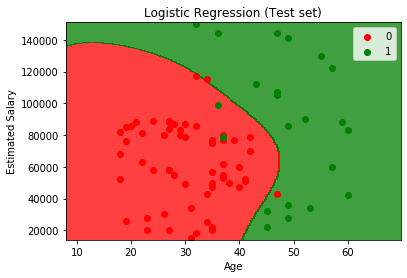

In [38]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(X_test), y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()